In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import cv2
import math
from skimage.io import imread_collection
import random

In [2]:
X_dir = 'C:/Users/Aditya Saini/DIP Project/Dataset/Training_Images/*.jpg'
X_images = imread_collection(X_dir)

Y_dir = 'C:/Users/Aditya Saini/DIP Project/Dataset/Ground_Truth/*.png'
Y_images = imread_collection(Y_dir)

print(len(X_images), len(Y_images))

290 290


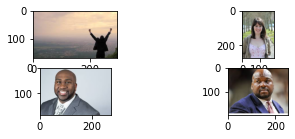

In [3]:
#Randomly show 5 images

randomlist = random.sample(range(0, len(X_images)), 5)
for i in range(1,len(randomlist)):
    plt.subplot(4,2,i)
    plt.imshow(X_images[i])

    

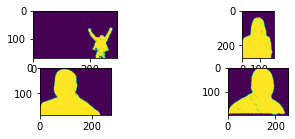

In [4]:
for i in range(1,len(randomlist)):
    plt.subplot(4,2,i)
    plt.imshow(Y_images[i])

In [5]:
X_images_final = []


idx=0
for img in X_images:
    print(idx)
    if len(img.shape)>2:
        img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
    print('Shape of image = ',img.shape)
    l=0
    w=0

    img = cv2.resize(img, (64,128), interpolation = cv2.INTER_AREA)
    print('Resize shape of image = ',img.shape)

    if(len(img)%16==0):
        l=len(img)
    else:
        l=len(img)-(len(img)%16)

    if(len(img[0])%16==0):
        w=len(img[0])
    else:
        w=len(img[0])-(len(img[0])%16)

    lm=len(img)%16
    wm=len(img[0])%16

    reshaped=np.zeros([l,w])
    reshaped=img[lm//2:len(img)-lm//2, wm//2:len(img[0])-wm//2]

    #reshaped=img.reshape(l,w)
    #re12=img.reshape(128,64)

    grx=np.zeros([l,w])
    gry=np.zeros([l,w])

    mag=np.zeros([l,w])
    ang=np.zeros([l,w])

    Fx=[[1,2,1],[0,0,0],[1,2,1]]
    Fy=[[-1,0,1],[-2,0,2],[-1,0,1]]

    for i in range(1,l-1):
        for j in range(1,w-1):
            tempx=0
            tempy=0
            for k1 in range(-1,2):
                for l1 in range(-1,2):
                    tempx=tempx+reshaped[i+k1][j+l1]*Fx[k1+1][l1+1]
                    tempy=tempy+reshaped[i+k1][j+l1]*Fy[k1+1][l1+1]

            grx[i][j]=tempx
            gry[i][j]=tempy

            mag[i][j]=math.sqrt(math.pow(grx[i][j],2)+math.pow(gry[i][j],2))
            if grx[i][j] == 0:
                ang[i][j] = math.atan(gry[i][j]/0.01)*(180/math.pi)
            else:
                ang[i][j]=math.atan(gry[i][j]/grx[i][j])*(180/math.pi)

    hog=[]

    for i in range(0,l,8):
        ro=[]
        for j in range(0,w,8):
            bini=[0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0]
            for i1 in range(i,i+8):
                for j1 in range(j,j+8):
                    lb=int(ang[i1][j1]/20)
                    ab=ang[i][j]%20
                    if(lb>160):
                        bini[8]=bini[8]+mag[i1][j1]
                    else:
                        ba=20-ab
                        bini[lb]=bini[lb]+(ba*mag[i1][j1])/20
                        bini[lb+1]=bini[lb+1]+(ab*mag[i1][j1])/20
            ro.append(bini)
        hog.append(ro)

    out=[]


    for i in range(0,len(hog)-1):
        for j in range(0,len(hog[0])-1):
            temp=[]
            temp=temp+hog[i][j]
            temp=temp+hog[i+1][j]
            temp=temp+hog[i][j+1]
            temp=temp+hog[i+1][j+1]
            s=0
            for i1 in range(0,len(temp)):
                s=s+(temp[i1]*temp[i1])
            sq=math.sqrt(s)
            for i1 in range(0,len(temp)):
                temp[i1]=temp[i1]/sq
            out=out+temp
    print('Lenght of HOG vector =', len(out))
    X_images_final.append(out)
    idx+=1


0
Shape of image =  (183, 276)
Resize shape of image =  (128, 64)
Lenght of HOG vector = 3780
1
Shape of image =  (168, 299)
Resize shape of image =  (128, 64)
Lenght of HOG vector = 3780
2
Shape of image =  (275, 183)
Resize shape of image =  (128, 64)
Lenght of HOG vector = 3780
3
Shape of image =  (183, 275)
Resize shape of image =  (128, 64)
Lenght of HOG vector = 3780
4
Shape of image =  (198, 255)
Resize shape of image =  (128, 64)
Lenght of HOG vector = 3780
5
Shape of image =  (248, 203)
Resize shape of image =  (128, 64)
Lenght of HOG vector = 3780
6
Shape of image =  (275, 183)
Resize shape of image =  (128, 64)
Lenght of HOG vector = 3780
7
Shape of image =  (183, 275)
Resize shape of image =  (128, 64)
Lenght of HOG vector = 3780
8
Shape of image =  (251, 201)
Resize shape of image =  (128, 64)
Lenght of HOG vector = 3780
9
Shape of image =  (183, 275)
Resize shape of image =  (128, 64)
Lenght of HOG vector = 3780
10
Shape of image =  (168, 299)
Resize shape of image =  (12

Lenght of HOG vector = 3780
87
Shape of image =  (411, 600)
Resize shape of image =  (128, 64)
Lenght of HOG vector = 3780
88
Shape of image =  (503, 805)
Resize shape of image =  (128, 64)
Lenght of HOG vector = 3780
89
Shape of image =  (789, 1184)
Resize shape of image =  (128, 64)
Lenght of HOG vector = 3780
90
Shape of image =  (315, 391)
Resize shape of image =  (128, 64)
Lenght of HOG vector = 3780
91
Shape of image =  (667, 1000)
Resize shape of image =  (128, 64)
Lenght of HOG vector = 3780
92
Shape of image =  (500, 750)
Resize shape of image =  (128, 64)
Lenght of HOG vector = 3780
93
Shape of image =  (720, 1280)
Resize shape of image =  (128, 64)
Lenght of HOG vector = 3780
94
Shape of image =  (767, 767)
Resize shape of image =  (128, 64)
Lenght of HOG vector = 3780
95
Shape of image =  (180, 300)
Resize shape of image =  (128, 64)
Lenght of HOG vector = 3780
96
Shape of image =  (599, 456)
Resize shape of image =  (128, 64)
Lenght of HOG vector = 3780
97
Shape of image =

Lenght of HOG vector = 3780
173
Shape of image =  (480, 640)
Resize shape of image =  (128, 64)
Lenght of HOG vector = 3780
174
Shape of image =  (480, 640)
Resize shape of image =  (128, 64)
Lenght of HOG vector = 3780
175
Shape of image =  (480, 640)
Resize shape of image =  (128, 64)
Lenght of HOG vector = 3780
176
Shape of image =  (480, 640)
Resize shape of image =  (128, 64)
Lenght of HOG vector = 3780
177
Shape of image =  (480, 640)
Resize shape of image =  (128, 64)
Lenght of HOG vector = 3780
178
Shape of image =  (480, 640)
Resize shape of image =  (128, 64)
Lenght of HOG vector = 3780
179
Shape of image =  (480, 640)
Resize shape of image =  (128, 64)
Lenght of HOG vector = 3780
180
Shape of image =  (480, 640)
Resize shape of image =  (128, 64)
Lenght of HOG vector = 3780
181
Shape of image =  (480, 640)
Resize shape of image =  (128, 64)
Lenght of HOG vector = 3780
182
Shape of image =  (480, 640)
Resize shape of image =  (128, 64)
Lenght of HOG vector = 3780
183
Shape of

Lenght of HOG vector = 3780
259
Shape of image =  (501, 779)
Resize shape of image =  (128, 64)
Lenght of HOG vector = 3780
260
Shape of image =  (240, 480)
Resize shape of image =  (128, 64)
Lenght of HOG vector = 3780
261
Shape of image =  (1155, 770)
Resize shape of image =  (128, 64)
Lenght of HOG vector = 3780
262
Shape of image =  (288, 360)
Resize shape of image =  (128, 64)
Lenght of HOG vector = 3780
263
Shape of image =  (362, 644)
Resize shape of image =  (128, 64)
Lenght of HOG vector = 3780
264
Shape of image =  (639, 1000)
Resize shape of image =  (128, 64)
Lenght of HOG vector = 3780
265
Shape of image =  (417, 626)
Resize shape of image =  (128, 64)
Lenght of HOG vector = 3780
266
Shape of image =  (900, 1079)
Resize shape of image =  (128, 64)
Lenght of HOG vector = 3780
267
Shape of image =  (398, 600)
Resize shape of image =  (128, 64)
Lenght of HOG vector = 3780
268
Shape of image =  (1024, 683)
Resize shape of image =  (128, 64)
Lenght of HOG vector = 3780
269
Shap

In [6]:
print(np.array(X_images_final).shape)

(290, 3780)


In [7]:
pd.DataFrame(X_images_final)

,0,1,2,3,4,5,6,7,8,9,...,3770,3771,3772,3773,3774,3775,3776,3777,3778,3779
0,0.444821,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.505437,...,0.000000,0.124561,0.632578,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
1,0.434461,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.487648,...,0.018834,0.181637,0.307715,0.0,0.0,0.0,0.0,0.0,0.0,0.003722
2,0.443801,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.511364,...,0.000000,0.413169,0.319287,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
3,0.431341,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.495853,...,0.000000,0.521349,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
4,0.537279,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.688090,...,0.000000,0.146069,0.490213,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
285,0.434546,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.494403,...,0.000000,0.236469,0.306966,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
286,0.463738,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.555510,...,0.000000,0.052445,0.416239,0.0,0.0,0.0,0.0,0.0,0.0,0.001417
287,0.526280,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.617121,...,0.000000,0.407685,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
288,0.640043,0.176661,0.0,0.0,0.0,0.0,0.0,0.0,0.034332,0.327429,...,0.000000,0.066137,0.357528,0.0,0.0,0.0,0.0,0.0,0.0,0.000000


In [8]:
np.savetxt('X_hog_images.csv', np.array(X_images_final), delimiter=',')


In [16]:
#Preprocessing target values
Y_images_final = []
idx=0
for img in Y_images:
    Y_images_final.append(cv2.resize(img, (30,30), interpolation = cv2.INTER_AREA).ravel())
    print(idx)
    idx+=1

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [17]:
pd.DataFrame(Y_images_final)

,0,1,2,3,4,5,6,7,8,9,...,890,891,892,893,894,895,896,897,898,899
0,0,0,0,0,0,0,0,0,0,0,...,111,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,213,182,119,105,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,255,255,255,255,255,255,255,55,0,0
3,0,0,0,0,0,0,0,0,0,0,...,255,255,255,255,252,11,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,23,64,153,139,78,37,96,57,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
285,0,0,0,0,0,0,0,0,0,0,...,255,255,255,255,255,255,255,255,255,255
286,0,0,0,0,0,0,0,0,0,0,...,255,255,255,208,0,0,0,0,0,0
287,0,0,0,0,0,0,0,0,0,0,...,255,255,255,203,7,0,0,0,0,0
288,0,0,0,0,0,180,255,255,255,255,...,255,255,255,255,255,255,255,255,255,255


In [18]:
np.savetxt('Y_target_images.csv', np.array(Y_images_final), delimiter=',')
